## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Loading and Exploring the Dataset

In [2]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Checking for Missing Values and Data Types

In [3]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

print("\nData Types:")
print(data.dtypes)

Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data Types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


## Encoding Categorical Features

In [6]:
# Encoding categorical features like 'gender' and 'smoking_history'
labelencoder = LabelEncoder()
data['gender'] = labelencoder.fit_transform(data['gender'])
data['smoking_history'] = labelencoder.fit_transform(data['smoking_history'])

# Display first few rows after encoding
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


## Data Visualization and Exploratory Data Analysis (EDA)

### Distribution of the Target Variable (Diabetes)

In [ ]:
# Visualize the distribution of the target variable (diabetes)
sns.countplot(data=data, x='diabetes', palette='coolwarm')
plt.title("Distribution of Diabetes")
plt.show()

### Correlation Heatmap

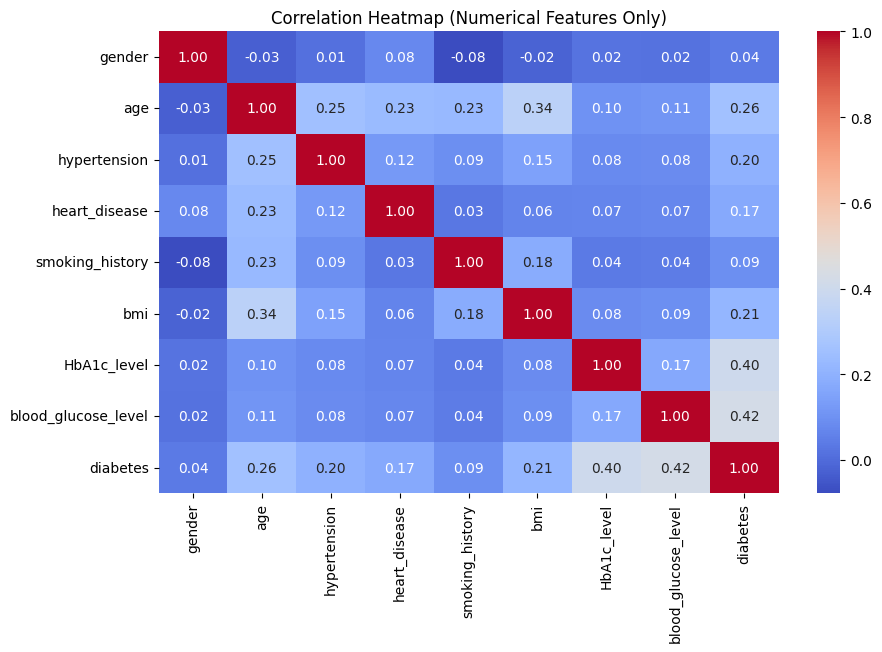

In [20]:
# Exclude non-numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=[np.number])

# Plot the correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

## Splitting the Data into Training and Testing Sets

In [7]:
# Define the feature matrix (X) and the target vector (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building and Evaluating the Models

In [8]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

### Random Forest Classifier

In [9]:
print("\nRandom Forest Classifier:")
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
evaluate_model(rfc, X_test, y_test)


Random Forest Classifier:
Accuracy: 0.9708
Confusion Matrix:
 [[18234    58]
 [  527  1181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



### K-Nearest Neighbors (KNN)

In [10]:
print("\nK-Nearest Neighbors (KNN):")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)


K-Nearest Neighbors (KNN):
Accuracy: 0.9613
Confusion Matrix:
 [[18163   129]
 [  646  1062]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.89      0.62      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



### AdaBoost Classifier

In [11]:
print("\nAdaBoost Classifier:")
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
evaluate_model(ada, X_test, y_test)


AdaBoost Classifier:
Accuracy: 0.9721
Confusion Matrix:
 [[18253    39]
 [  519  1189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



### Logistic Regression

In [12]:
print("\nLogistic Regression:")
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test)


Logistic Regression:
Accuracy: 0.9587
Confusion Matrix:
 [[18127   165]
 [  661  1047]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



### Decision Tree Classifier

In [13]:
print("\nDecision Tree Classifier:")
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
evaluate_model(dtc, X_test, y_test)


Decision Tree Classifier:
Accuracy: 0.9524
Confusion Matrix:
 [[17785   507]
 [  446  1262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



## Comparison of Model Accuracies

C:\Users\waqas\AppData\Local\Temp\ipykernel_896\325056982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


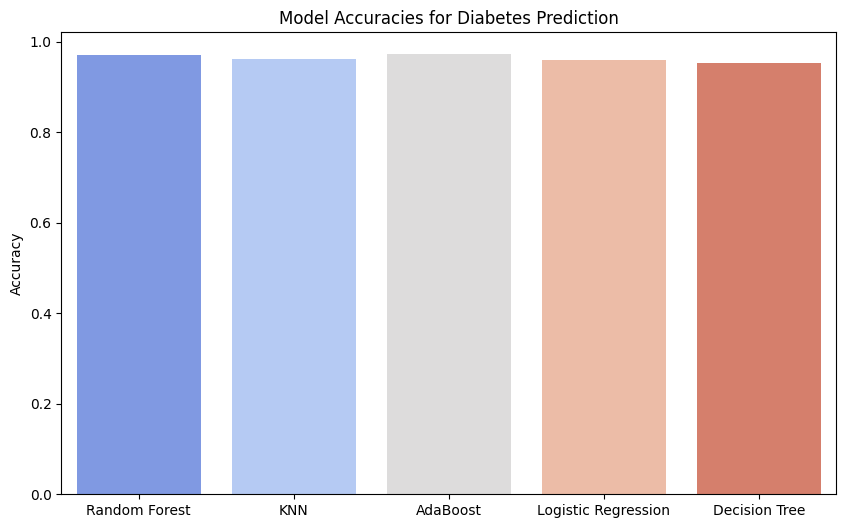

In [19]:
# Compare model accuracies
models = ['Random Forest', 'KNN', 'AdaBoost', 'Logistic Regression', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, rfc.predict(X_test)),
    accuracy_score(y_test, knn.predict(X_test)),
    accuracy_score(y_test, ada.predict(X_test)),
    accuracy_score(y_test, lr.predict(X_test)),
    accuracy_score(y_test, dtc.predict(X_test))
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title("Model Accuracies for Diabetes Prediction")
plt.ylabel("Accuracy")
plt.show()